# Final Project Code

### Bailey Blum, Molly Giglia, Horacio Lopez & Ale Lopez

# DONT RUN THIS --------------

In [1]:
import json
import pandas as pd
    

with open('yelp_dataset/review.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

In [2]:
texts = [d['text'] for d in data]
stars = [d['stars'] for d in data]

In [3]:
from collections import Counter

freqs = Counter(stars)

# the least common class is the maximum number we want for all classes
max_allowable = 5000
#max_allowable = freqs.most_common()[-1][1]
num_added = {clss: 0 for clss in freqs.keys()}
new_stars = []
new_texts = []
total = 0
counter = 0

for i, y in enumerate(stars):
    total += len(texts[i])
    counter += 1

avg = total / counter

 
def balance_classes(texts, stars):

    freqs = Counter(stars)

    # the least common class is the maximum number we want for all classes
    max_allowable = 5000
    #max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_stars = []
    new_texts = []
    for i, y in enumerate(stars):
        if len(texts[i]) < avg*1.5 and len(texts[i]) > avg:
            if num_added[y] < max_allowable:
                new_stars.append(y)
                new_texts.append(texts[i])
                num_added[y] += 1
    return new_texts, new_stars

In [4]:
#print(Counter(stars))
balanced_x, balanced_y = balance_classes(texts, stars)
print(Counter(balanced_y))
#print(balanced_y[:10])

Counter({5.0: 5000, 4.0: 5000, 3.0: 5000, 1.0: 5000, 2.0: 5000})


In [5]:
import os
os.remove("texts.txt")
os.remove("stars.txt")
f = open("texts.txt", "w")
f2 = open("stars.txt", "w")
for item in balanced_x:
    f.write(item + "Gigliablurb")
for item in balanced_y:
    f2.write(str(int(item)) + '\n')
f.close()
f2.close()

# RUN FROM HERE DOWN -------------------

In [86]:
import json
import pandas as pd
import numpy as np
from collections import Counter
from pylab import *

f = open("texts.txt", "r")
f2 = open("stars.txt", "r")

balanced_x = []
balanced_y = []
listOfLines = f.read().split('Gigliablurb')
for item in listOfLines:
    balanced_x.append(item)
for item in f2.readlines():
    balanced_y.append(item)
    
f.close()
f2.close()

balanced_x = balanced_x[:-1]
print(len(balanced_x))
print(balanced_x[1])

25000
Like walking back in time, every Saturday morning my sister and I was in a bowling league and after we were done, we'd spend a few quarters playing the pin ball machines until our mother came to pick us up.

My sister was daring and play the machines hard, she was afraid of that "tilt" showing up and freezing the game.  I, on the other hand was a bit more gentler and wanted to make sure I got my quarter's worth.

This place has rows and rows of machines, some are really old and some are more of a mid 80's theme.  There is even a Ms pac man!  It was fun to spend an afternoon playing the machines and remembering all the fun of my early teen years.


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import datetime
 
# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words="english")
t1 = datetime.datetime.now()
 
# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(balanced_x)
print(datetime.datetime.now() - t1)

0:00:08.658030


In [4]:
feature_names = vectorizer.get_feature_names()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.20, random_state=42)

In [6]:
## from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# initialise the Naive-Bayes classifier
# classifier = MultinomialNB()
# classifier = ComplementNB()
#classifier = LinearSVC()
# classifier = tree.DecisionTreeClassifier(max_depth=15)
# classifier = RandomForestClassifier(n_estimators=100)
# classifier = AdaBoostClassifier(n_estimators=10) #takes 7.5 mins
classifier = LogisticRegression()

#Run it
t1 = datetime.datetime.now()
#X_train = X_train.toarray()
classifier.fit(X_train, y_train)
print(datetime.datetime.now() - t1)

/Users/mollygiglia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mollygiglia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0:00:06.924436


In [7]:
import joblib
joblib.dump(classifier, 'yelprecs.pkl', compress=9)
print(X_test[1])
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

  (0, 644827)	0.06059060577554962
  (0, 408934)	0.06059060577554962
  (0, 569430)	0.06059060577554962
  (0, 514458)	0.06059060577554962
  (0, 769856)	0.06059060577554962
  (0, 127428)	0.06059060577554962
  (0, 653537)	0.06059060577554962
  (0, 528969)	0.06059060577554962
  (0, 247694)	0.06059060577554962
  (0, 293657)	0.06059060577554962
  (0, 511933)	0.06059060577554962
  (0, 503791)	0.06059060577554962
  (0, 638111)	0.06059060577554962
  (0, 57976)	0.06059060577554962
  (0, 700288)	0.06059060577554962
  (0, 511980)	0.06059060577554962
  (0, 732670)	0.06059060577554962
  (0, 408941)	0.06059060577554962
  (0, 823995)	0.06059060577554962
  (0, 280580)	0.06059060577554962
  (0, 901972)	0.06059060577554962
  (0, 147185)	0.06059060577554962
  (0, 129243)	0.06059060577554962
  (0, 168530)	0.06059060577554962
  (0, 557192)	0.06059060577554962
  :	:
  (0, 503746)	0.03895438551408601
  (0, 408897)	0.12166647701987879
  (0, 770553)	0.042134693065845975
  (0, 601246)	0.10489248382098507
  (0, 43

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))


0.5584


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          1
       0.64      0.76      0.70       976
          2
       0.50      0.43      0.46      1003
          3
       0.48      0.40      0.44       996
          4
       0.49      0.50      0.50      1008
          5
       0.65      0.69      0.67      1017

    accuracy                           0.56      5000
   macro avg       0.55      0.56      0.55      5000
weighted avg       0.55      0.56      0.55      5000



In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[746 171  25  10  24]
 [269 433 202  51  48]
 [ 77 211 399 241  68]
 [ 34  46 181 508 239]
 [ 44   9  26 232 706]]


In [11]:
# # only for trees --> feature importance

# importances = classifier.feature_importances_
# indices = np.argsort(importances)[::-1]
# # Print the feature ranking
# print("Feature ranking:")

# for f in range(20):
#     print(feature_names[indices[f]])

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
new_y_test = []
for rating in y_test:
    if rating == '5\n':
        new_y_test.append([0,0,0,0,1])
    elif rating == '4\n':
        new_y_test.append([0,0,0,1,0])
    elif rating == '3\n':
        new_y_test.append([0,0,1,0,0])
    elif rating == '2\n':
        new_y_test.append([0,1,0,0,0])
    elif rating == '1\n':
        new_y_test.append([1,0,0,0,0])
new_y_test = np.array(new_y_test)
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(new_y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(new_y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [13]:
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

colors = cycle(['cadetblue', 'darkorange', 'darkslategray', 'green', 'deeppink'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
tf = []
bf = []

def plot_coefficients(classifier, feature_names, top_features=20):

    # Access the coefficients from classifier
    coef = classifier.coef_

    # Access the classes
    classes = classifier.classes_

    # Iterate the loop for number of classes
    for i in range(len(classes)):
        print(classes[i])

        class_coef = coef[i]
        feature_names = np.array(feature_names)
        top_positive_coefficients = np.argsort(class_coef)[-top_features:]
        top_negative_coefficients = np.argsort(class_coef)[:top_features]
        tf.append(feature_names[np.array(top_positive_coefficients)])
        bf.append(feature_names[np.array(top_negative_coefficients)])
        
        top_coefficients = np.hstack([top_negative_coefficients, 
                                      top_positive_coefficients])
        plt.figure(figsize=(10, 3))

        colors = ["red" if c < 0 else "blue" for c in class_coef[top_coefficients]]
        plt.bar(np.arange(2 * top_features), class_coef[top_coefficients], color=colors)
       

        plt.xticks(np.arange(0, 1 + 2 * top_features), 
                   feature_names[top_coefficients], rotation=60, ha="right")
        plt.show()

1



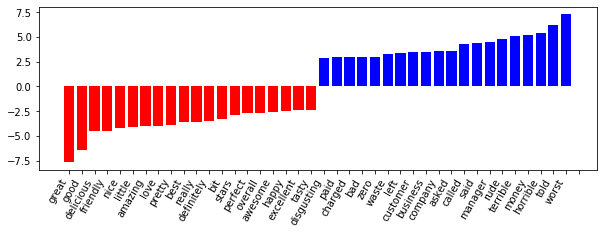

2



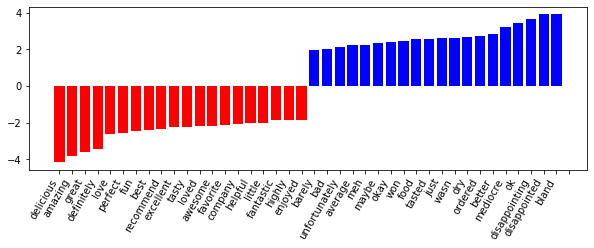

3



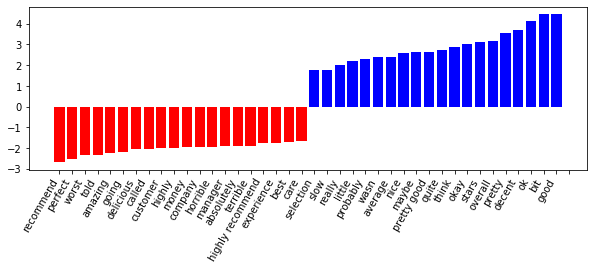

4



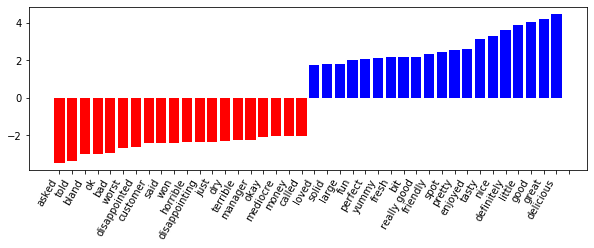

5



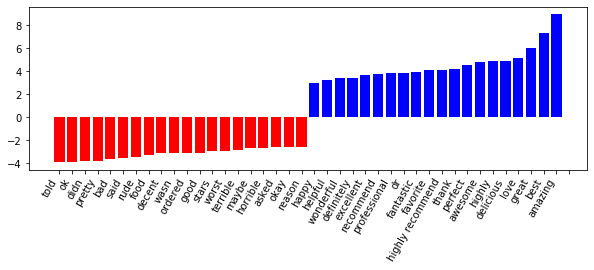

In [15]:
plot_coefficients(classifier, feature_names, 20)

# Demo

In [16]:
from ipywidgets import widgets
from IPython.display import display
text = widgets.Text()
display(text)
def handle_submit(sender):
    val = text.value
    balanced_x.append(val)
    vectors = vectorizer.fit_transform(balanced_x)
    preds = classifier.predict(vectors)
    print(preds[-1])
    
text.on_submit(handle_submit)

Text(value='')

In [17]:
tf

[array(['disgusting', 'paid', 'charged', 'bad', 'zero', 'waste', 'left',
        'customer', 'business', 'company', 'asked', 'called', 'said',
        'manager', 'rude', 'terrible', 'money', 'horrible', 'told',
        'worst'], dtype='<U66'),
 array(['barely', 'bad', 'unfortunately', 'average', 'meh', 'maybe',
        'okay', 'won', 'food', 'tasted', 'just', 'wasn', 'dry', 'ordered',
        'better', 'mediocre', 'ok', 'disappointing', 'disappointed',
        'bland'], dtype='<U66'),
 array(['selection', 'slow', 'really', 'little', 'probably', 'wasn',
        'average', 'nice', 'maybe', 'pretty good', 'quite', 'think',
        'okay', 'stars', 'overall', 'pretty', 'decent', 'ok', 'bit',
        'good'], dtype='<U66'),
 array(['loved', 'solid', 'large', 'fun', 'perfect', 'yummy', 'fresh',
        'bit', 'really good', 'friendly', 'spot', 'pretty', 'enjoyed',
        'tasty', 'nice', 'definitely', 'little', 'good', 'great',
        'delicious'], dtype='<U66'),
 array(['happy', 'helpful'

In [18]:
bf

[array(['great', 'good', 'delicious', 'friendly', 'nice', 'little',
        'amazing', 'love', 'pretty', 'best', 'really', 'definitely', 'bit',
        'stars', 'perfect', 'overall', 'awesome', 'happy', 'excellent',
        'tasty'], dtype='<U66'),
 array(['delicious', 'amazing', 'great', 'definitely', 'love', 'perfect',
        'fun', 'best', 'recommend', 'excellent', 'tasty', 'loved',
        'awesome', 'favorite', 'company', 'helpful', 'little', 'fantastic',
        'highly', 'enjoyed'], dtype='<U66'),
 array(['recommend', 'perfect', 'worst', 'told', 'amazing', 'going',
        'delicious', 'called', 'customer', 'highly', 'money', 'company',
        'horrible', 'manager', 'absolutely', 'terrible',
        'highly recommend', 'experience', 'best', 'care'], dtype='<U66'),
 array(['asked', 'told', 'bland', 'ok', 'bad', 'worst', 'disappointed',
        'customer', 'said', 'won', 'horrible', 'disappointing', 'just',
        'dry', 'terrible', 'manager', 'okay', 'mediocre', 'money',
     

In [19]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [20]:
for i in range(4):
    print(jaccard_similarity(tf[i], tf[i+1]))

0.02564102564102564
0.14285714285714285
0.14285714285714285
0.1111111111111111


In [21]:
for i in range(4):
    print(jaccard_similarity(bf[i], bf[i+1]))

0.3793103448275862
0.21212121212121213
0.25
0.2903225806451613


In [22]:
jaccard_similarity(bf[0], tf[4])

0.3333333333333333

In [23]:
jaccard_similarity(bf[4], tf[1])

0.21212121212121213

In [24]:
for i in [0, 1, 2, 3]:
    print(jaccard_similarity(tf[4], bf[i]))

0.3333333333333333
0.5384615384615384
0.21212121212121213
0.0


In [25]:
for i in [0, 1, 2, 4]:
    print(jaccard_similarity(tf[3], bf[i]))

0.3793103448275862
0.2903225806451613
0.05263157894736842
0.05263157894736842


In [26]:
for i in [0, 1, 3, 4]:
    print(jaccard_similarity(tf[2], bf[i]))

0.25
0.02564102564102564
0.05263157894736842
0.25


In [27]:
for i in [0, 2, 3, 4]:
    print(jaccard_similarity(tf[1], bf[i]))

0.0
0.0
0.3333333333333333
0.21212121212121213


In [28]:
for i in [1, 2, 3, 4]:
    print(jaccard_similarity(tf[0], bf[i]))

0.02564102564102564
0.2903225806451613
0.3793103448275862
0.25


In [29]:
feature_names

['00',
 '00 00',
 '00 05',
 '00 10',
 '00 100',
 '00 11',
 '00 12',
 '00 14',
 '00 15',
 '00 16oz',
 '00 20',
 '00 200',
 '00 25',
 '00 30',
 '00 30am',
 '00 45',
 '00 50',
 '00 ac',
 '00 added',
 '00 additional',
 '00 admission',
 '00 adults',
 '00 advised',
 '00 afternoon',
 '00 album',
 '00 allegiant',
 '00 american',
 '00 answer',
 '00 anyways',
 '00 appointment',
 '00 approximately',
 '00 array',
 '00 arrived',
 '00 ashley',
 '00 asked',
 '00 average',
 '00 avoue',
 '00 bacon',
 '00 based',
 '00 basic',
 '00 beat',
 '00 believe',
 '00 best',
 '00 beverages',
 '00 bites',
 '00 book',
 '00 books',
 '00 borscht',
 '00 bottle',
 '00 bottomless',
 '00 breakfast',
 '00 bring',
 '00 bucks',
 '00 buddy',
 '00 burger',
 '00 burgers',
 '00 busy',
 '00 buy',
 '00 called',
 '00 calls',
 '00 came',
 '00 camperworld',
 '00 cancellation',
 '00 card',
 '00 carne',
 '00 carpet',
 '00 ceasar',
 '00 chance',
 '00 change',
 '00 char',
 '00 charge',
 '00 charged',
 '00 cheese',
 '00 chicken',
 '00 chi

In [35]:
coef = classifier.coef_
coef[0]

array([ 1.94270904,  0.11142023,  0.04543641, ..., -0.01595429,
       -0.01595429, -0.01595429])

In [50]:
amazing = feature_names.index('amazing')

In [51]:
meh = feature_names.index('meh')

In [71]:
good = feature_names.index('good')

In [79]:
rude = feature_names.index('rude')

In [54]:
ok = feature_names.index('ok')

In [94]:
x_1 = []
y_1 = []
for i in range(5):
    x_1.append(i+1)
    y_1.append(coef[i][amazing])
    print(coef[i][amazing])
#plt.plot(x_1, y_1)

-3.982005827859426
-3.807980450816258
-2.250120781486062
-0.8078930048208134
8.951251455004643


In [95]:
x_2 = []
y_2 = []
for i in range(5):
    x_2.append(i+1)
    y_2.append(coef[i][meh])
    print(coef[i][meh])
#plot(x_2, y_2);
#title('Importance of Meh');
#xlabel('Class');
#ylabel('Importance');
#show()

-0.6847935363483013
2.267456579770244
1.1185369668762877
-1.335820265389585
-1.4379312600162613


In [96]:
x_3 = []
y_3 = []
for i in range(5):
    x_3.append(i+1)
    y_3.append(coef[i][good])
    print(coef[i][good])
#plt.plot(x_3, y_3)

-6.433946719871909
-0.7180376089923058
4.468029092457437
4.060752669728832
-3.075573864367277


In [97]:
x_4 = []
y_4 = []
for i in range(5):
    x_4.append(i+1)
    y_4.append(coef[i][rude])
    print(coef[i][rude])
#plt.plot(x_4, y_4)

4.793586723893071
0.04889430211971812
-1.0798128841722647
-1.861044744568524
-3.488347743807912


-1.4045053990327931
3.458280272245749
4.120748451145606
-2.9912442605526905
-3.8614076224365


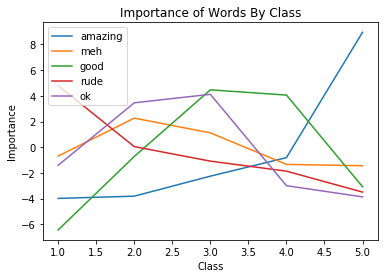

In [114]:
x_5 = []
y_5 = []
for i in range(5):
    x_5.append(i+1)
    y_5.append(coef[i][ok])
    print(coef[i][ok])
plot(x_1, y_1)
plot(x_2, y_2)
plot(x_3, y_3)
plot(x_4, y_4)
plot(x_5, y_5)
title("Importance of Words By Class");
ylabel("Importance");
xlabel("Class");
legend(['amazing','meh','good','rude','ok'])